In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime


from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier




In [64]:
#uploading kickstarter data
df = pd.read_csv('ks-projects-201801.csv')

In [66]:
#next few lines- for me to know the data better, and find out what and how excecliy i'm going to predict succes or fail for new campians 
df.head(10)

ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2  1000004038                                     Where is Hank?   
3  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4  1000011046  Community Film Project: The Art of Neighborhoo...   
5  1000014025                               Monarch Espresso Bar   
6  1000023410  Support Solar Roasted Coffee & Green Energy!  ...   
7  1000030581  Chaser Strips. Our Strips make Shots their B*tch!   
8  1000034518  SPIN - Premium Retractable In-Ear Headphones w...   
9   100004195  STUDIO IN THE SKY - A Documentary Feature Film...   

         category main_category currency    deadline      goal  \
0          Poetry    Publishing      GBP  2015-10-09    1000.0   
1  Narrative Film  Film & Video      USD  2017-11-01   30000.0   
2  Narrative Film  Film & Video      USD  2013-02-26   45000.0   
3           Music         Music      USD  2012-04-16    5000.0   
4    Film & Video  Film & Video      USD  2015-08-29   19500.0   
5     Restaurants          Food      USD  2016-04-01   50000.0   
6            Food          Food      USD  2014-12-21    1000.0   
7          Drinks          Food      USD  2016-03-17   25000.0   
8  Product Design        Design      USD  2014-05-29  125000.0   
9     Documentary  Film & Video      USD  2014-08-10   65000.0   

              launched   pledged       state  backers country  usd pledged  \
0  2015-08-11 12:12:28      0.00      failed        0      GB         0.00   
1  2017-09-02 04:43:57   2421.00      failed       15      US       100.00   
2  2013-01-12 00:20:50    220.00      failed        3      US       220.00   
3  2012-03-17 03:24:11      1.00      failed        1      US         1.00   
4  2015-07-04 08:35:03   1283.00    canceled       14      US      1283.00   
5  2016-02-26 13:38:27  52375.00  successful      224      US     52375.00   
6  2014-12-01 18:30:44   1205.00  successful       16      US      1205.00   
7  2016-02-01 20:05:12    453.00      failed       40      US       453.00   
8  2014-04-24 18:14:43   8233.00    canceled       58      US      8233.00   
9  2014-07-11 21:55:48   6240.57    canceled       43      US      6240.57   

   usd_pledged_real  usd_goal_real  
0              0.00        1533.95  
1           2421.00       30000.00  
2            220.00       45000.00  
3              1.00        5000.00  
4           1283.00       19500.00  
5          52375.00       50000.00  
6           1205.00        1000.00  
7            453.00       25000.00  
8           8233.00      125000.00  
9           6240.57       65000.00

In [68]:
df.shape

(378661, 15)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


We have 15 initial features:

ID: internal kickstarter id

name: name of project - A project is a finite work with a clear goal that you’d like to bring to life. Think albums, books, or films.

category: category

main_category: category of campaign

currency: currency used to support

deadline: deadline for crowdfunding

goal: fundraising goal - The funding goal is the amount of money that a creator needs to complete their project.

launched: date launched

pledged: amount pledged by "crowd"

state: Current condition the project is in

backers: number of backers

country: country pledged from

usd pledged: Pledged amount in USD 

usd_pledged_real: Pledged amount in USD 

usd_goal_real: Goal amount in USD 

In [74]:
df.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [75]:
missing_data=round(((df.isnull().sum())/(df.isnull().count()))*100)

In [76]:
#usd pledged -the only one problometic. 
missing_data

ID                  0.0
name                0.0
category            0.0
main_category       0.0
currency            0.0
deadline            0.0
goal                0.0
launched            0.0
pledged             0.0
state               0.0
backers             0.0
country             0.0
usd pledged         1.0
usd_pledged_real    0.0
usd_goal_real       0.0
dtype: float64

In [77]:
#fill missing values. if we look closer at the DF we can see that those 2 values look quite the same
df['usd pledged'].fillna(df['usd_pledged_real'], inplace=True)

missing_data=round(((df.isnull().sum())/(df.isnull().count()))*100)
missing_data

ID                  0.0
name                0.0
category            0.0
main_category       0.0
currency            0.0
deadline            0.0
goal                0.0
launched            0.0
pledged             0.0
state               0.0
backers             0.0
country             0.0
usd pledged         0.0
usd_pledged_real    0.0
usd_goal_real       0.0
dtype: float64

In [78]:
#steel learning kickstartr,creating series of the amount of uniques values
ser = df.nunique()

In [79]:
print('numbers of countries using KS (applying projects):')
print(ser['country']) 

#catgories can be : sports, food, games, ETC.
ser['main_category']
print('numbers of main categories:')
print(ser['main_category'])
print('numbers of categories:')
print(ser['category'])

numbers of countries using KS (applying projects):
23
numbers of main categories:
15
numbers of categories:
159


In [80]:
df["state"].value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

In [81]:
 
percentual_sucess = round(df["state"].value_counts() / len(df["state"]) * 100,4)

print("State Percentual in %: ")
print(percentual_sucess)

State Percentual in %: 
failed        52.2153
successful    35.3762
canceled      10.2411
undefined      0.9407
live           0.7392
suspended      0.4875
Name: state, dtype: float64


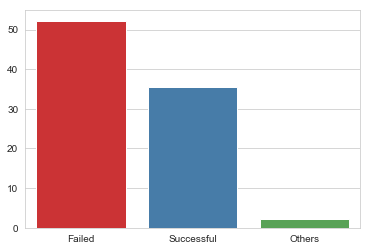

In [82]:
#in order to preform this plot (I really wanted it), I had to use seaborn. 
sns.set_style("whitegrid")
sns.barplot(["Failed", "Successful", "Others"],
            y= [52.2153, 35.3762, 0.9407+0.7392+0.4875],
            palette = "Set1"
            )


In [83]:
#lets talk about the countries
df['country'].value_counts()


US      292627
GB       33672
CA       14756
AU        7839
DE        4171
N,0"      3797
FR        2939
IT        2878
NL        2868
ES        2276
SE        1757
MX        1752
NZ        1447
DK        1113
IE         811
CH         761
NO         708
HK         618
BE         617
AT         597
SG         555
LU          62
JP          40
Name: country, dtype: int64

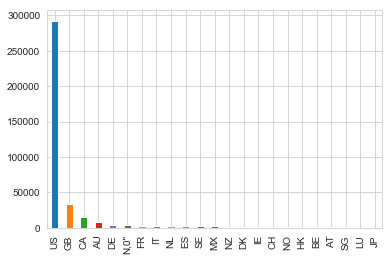

In [84]:
df['country'].value_counts().plot.bar()
plt.show()

In [85]:
#for better and detailed understanig ,just change 'main_category' to 'catregory'
df1=df.groupby('main_category').state.value_counts().unstack()
df1.head()

state          canceled   failed   live  successful  suspended  undefined
main_category                                                            
Art              2222.0  14131.0  194.0     11510.0       96.0        NaN
Comics            842.0   4036.0   76.0      5842.0       23.0        NaN
Crafts            843.0   5703.0   76.0      2115.0       72.0        NaN
Dance             163.0   1235.0   18.0      2338.0       13.0        1.0
Design           4152.0  14814.0  305.0     10550.0      247.0        2.0

In [86]:
df1 = df1.drop(columns=['live','suspended','undefined','canceled'])

In [87]:
df1['delta'] = df1['successful'] - df1['failed']


In [88]:
df1.sort_values(by=['delta'])

state           failed  successful    delta
main_category                              
Technology     20616.0      6434.0 -14182.0
Publishing     23145.0     12300.0 -10845.0
Food           15969.0      6085.0  -9884.0
Film & Video   32904.0     23623.0  -9281.0
Fashion        14182.0      5593.0  -8589.0
Design         14814.0     10550.0  -4264.0
Crafts          5703.0      2115.0  -3588.0
Games          16003.0     12518.0  -3485.0
Photography     6384.0      3305.0  -3079.0
Art            14131.0     11510.0  -2621.0
Journalism      3137.0      1012.0  -2125.0
Dance           1235.0      2338.0   1103.0
Comics          4036.0      5842.0   1806.0
Music          21752.0     24197.0   2445.0
Theater         3708.0      6534.0   2826.0

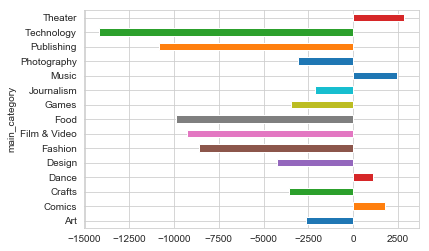

In [89]:
#well, before lanching a KS project it's better for you to know this plot.comics in, tech out.
df1['delta'].plot.barh()
plt.show()

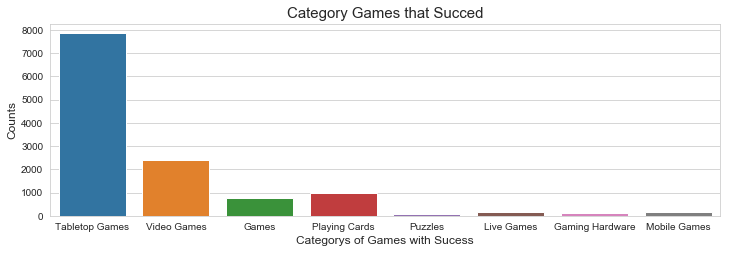

In [90]:
sucess_games = df[(df['main_category'] == 'Games') & 
                      (df['state'] == 'successful')]
plt.figure(figsize=(12,12))
plt.subplot(3,1,3)
ax2 = sns.countplot(x='category', data=sucess_games)

ax2.set_title("Category Games that Succed", fontsize=15)
ax2.set_xlabel("Categorys of Games with Sucess", fontsize=12)
ax2.set_ylabel("Counts", fontsize=12)
plt.show()

In [91]:
#preper the data- from know on we will use df2 (cleaning process)
df2 = df[ ((df['state'] == 'failed') | 
           (df['state'] == 'successful')) & 
         (df['country'] == 'US') ]
df2 = df2.drop(columns=['ID','name','usd pledged','usd_pledged_real','country','usd_goal_real','category','currency','pledged'])

print(df2.shape)
df2.head()

(261360, 6)


main_category    deadline     goal             launched       state  backers
1  Film & Video  2017-11-01  30000.0  2017-09-02 04:43:57      failed       15
2  Film & Video  2013-02-26  45000.0  2013-01-12 00:20:50      failed        3
3         Music  2012-04-16   5000.0  2012-03-17 03:24:11      failed        1
5          Food  2016-04-01  50000.0  2016-02-26 13:38:27  successful      224
6          Food  2014-12-21   1000.0  2014-12-01 18:30:44  successful       16

In [92]:
#prepertions
df2['month'] = pd.DatetimeIndex(df2['launched']).month

df2['state'] = df2['state'].map({     
        'failed': 0,
        'successful': 1         
})

df2['main_category']=df2['main_category'].map({     
        'Technology': 1,
        'Publishing': 2 ,
        'Food': 3 ,
        'Film & Video': 4 ,
        'Fashion': 5 ,
        'Design': 6 ,
        'Crafts': 7 ,
        'Games': 8 ,
        'Photography': 9 ,
        'Art': 10 ,
        'Journalism': 11 ,
        'Dance': 12 ,
        'Comics': 13 ,
        'Music': 14 ,
        'Theater': 15
})

#by the way, I now that  I can do this more simplly with this code:

#from sklearn.preprocessing import LabelEncoder
#labelencoder = LabelEncoder()
#df2.main_category = labelencoder.fit_transform(df2.main_category)

df2.head()

main_category    deadline     goal             launched  state  backers  \
1              4  2017-11-01  30000.0  2017-09-02 04:43:57      0       15   
2              4  2013-02-26  45000.0  2013-01-12 00:20:50      0        3   
3             14  2012-04-16   5000.0  2012-03-17 03:24:11      0        1   
5              3  2016-04-01  50000.0  2016-02-26 13:38:27      1      224   
6              3  2014-12-21   1000.0  2014-12-01 18:30:44      1       16   

   month  
1      9  
2      1  
3      3  
5      2  
6     12

In [93]:
df2=df2.drop(columns=['launched','deadline','backers'])     #   the fetured that i dropped are may be needed
df2.head(10)                                                # but I dropped this features because I assume that for a new kickstart project we may not have any knowledge of them.


main_category      goal  state  month
1               4   30000.0      0      9
2               4   45000.0      0      1
3              14    5000.0      0      3
5               3   50000.0      1      2
6               3    1000.0      1     12
7               3   25000.0      0      2
11             14   12500.0      1      3
12              7    5000.0      0      9
13              8  200000.0      0      2
15              6    2500.0      0      1

In [94]:
df2['month'].value_counts()

7     25604
3     23893
5     23046
4     22914
6     22882
8     22838
10    22720
9     21464
11    21271
2     20864
1     19501
12    14363
Name: month, dtype: int64

In [95]:
#dummies for  month
df3 = pd.get_dummies(df2.month)
df2 = df2.join(df3)
df2=df2.drop(columns=['month'])
df2.head()

main_category     goal  state  1  2  3  4  5  6  7  8  9  10  11  12
1              4  30000.0      0  0  0  0  0  0  0  0  0  1   0   0   0
2              4  45000.0      0  1  0  0  0  0  0  0  0  0   0   0   0
3             14   5000.0      0  0  0  1  0  0  0  0  0  0   0   0   0
5              3  50000.0      1  0  1  0  0  0  0  0  0  0   0   0   0
6              3   1000.0      1  0  0  0  0  0  0  0  0  0   0   0   1

In [96]:
# Check

print(df.shape)

print(df2.shape)

#lookes good to me, now ill start prepering the model

(378661, 15)
(261360, 15)


In [97]:
X=df2.drop('state',axis=1)
y=df2['state']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
#scaling for Knn for example is important.(because of the distanst) if we want we can use: 
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaler.fit(X)
#scaled_fetaurs = scaler.transform (X)



In [98]:
# Logistic Regression
lr=LogisticRegression()
lr.fit(X_train,y_train)
#we used the train model to get the prediction for our test data set (X_test)
predictions=lr.predict(X_test)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [133]:
#evalution process:classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.65      0.75      0.70     50257
           1       0.55      0.43      0.48     35992

   micro avg       0.62      0.62      0.62     86249
   macro avg       0.60      0.59      0.59     86249
weighted avg       0.61      0.62      0.61     86249



In [134]:
confusion_matrix(y_test, predictions)

array([[37810, 12447],
       [20602, 15390]], dtype=int64)

In [135]:
#12447 = false positive (type Im), 20602 = false negative

In [136]:
print(metrics.accuracy_score(y_test,predictions))

0.6168187457245881


In [137]:
#knn - predictions are made 
k=KNeighborsClassifier(n_neighbors=1)
k.fit(X_train,y_train)
#now we have train the model

predictions=k.predict(X_test)


In [138]:
#evalution procces
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.62      0.63      0.63     50257
           1       0.48      0.47      0.47     35992

   micro avg       0.56      0.56      0.56     86249
   macro avg       0.55      0.55      0.55     86249
weighted avg       0.56      0.56      0.56     86249



In [139]:
print(confusion_matrix(y_test, predictions))

[[31785 18472]
 [19108 16884]]


In [140]:
#18523 = false positive , 19152 = false negative

In [141]:
print(metrics.accuracy_score(y_test,predictions))

0.5642848033020673


In [108]:
#now ill find the optimum K , was important to me not to copy from Roey notnook, to do it in a other way
err_rate = []
for i in range(1,30):
    k = KNeighborsClassifier(n_neighbors=i)
    k.fit(X_train, y_train)
    pred_i=k.predict(X_test)
    
    err_rate.append(np.mean(pred_i !=y_test))

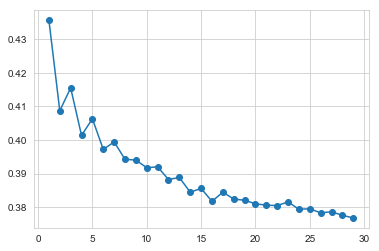

In [109]:
plt.plot(range(1,30), err_rate, marker='o')

In [110]:
#try k=1 to 30 and record testing accurecy


In [111]:
#we can learn that k=1 its a bad choice. looks like we need bigger K value. k>30

In [128]:
#knn - predictions are made 
k=KNeighborsClassifier(n_neighbors=30)
k.fit(X_train,y_train)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.65      0.75      0.70     50257
           1       0.55      0.43      0.48     35992

   micro avg       0.62      0.62      0.62     86249
   macro avg       0.60      0.59      0.59     86249
weighted avg       0.61      0.62      0.61     86249

[[37810 12447]
 [20602 15390]]


In [113]:
#12447 = false positive , 20602  = false negative
#we can improve the model with an other k selection


In [115]:
# ONE MORE MODLE THAT I CHOSE
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
predictions=dtc.predict(X_test)



In [116]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.65      0.75      0.70     50257
           1       0.55      0.43      0.48     35992

   micro avg       0.62      0.62      0.62     86249
   macro avg       0.60      0.59      0.59     86249
weighted avg       0.61      0.62      0.61     86249



In [117]:
print(confusion_matrix(y_test, predictions))

[[37810 12447]
 [20602 15390]]


In [118]:
#12437 = false positive , 20596  = false negative

In [119]:
print(metrics.accuracy_score(y_test,predictions))

0.6168187457245881


In [129]:
lr.score(X_test,y_test)

0.5826966109751998

In [130]:
lr.score(X_train,y_train)

0.5813683891931404

In [131]:
k.score(X_test,y_test)

0.6240188292038169

In [132]:
k.score(X_train,y_train)

0.6437802308250196

In [124]:
dtc.score(X_test,y_test)

0.6168187457245881

In [125]:
dtc.score(X_train,y_train)

0.7002015864223264

In [126]:
#need to ask myself what those numbers means and the conecttion to bias vs variance.  speaclly the diffrencd train \test values

In [127]:
########################################################################################